## Kaggle – DataTops®
Luismi ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a Luismi a mejorar ese modelo?

## Métrica: 
Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## Librerías

In [1]:
# Librerias base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Librerias Bootcamp (Data Science - The Bridge Oct24')
import bootcampviztools as bvt
import toolbox_ML as tml

# Semilla 42 para garantizar que los datos se mantengan
np.random.seed(42)

# Modelos de ML de regresión a utilizar en el notebook
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Herramientas de sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from scipy.stats import uniform, randint

# Otros
from PIL import Image
import urllib.request
import re
from math import sqrt


## Datos

In [2]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("C:/Users/rafae/Documents/GitHub/ONLINE_DS_THEBRIDGE_RAFAELNEDA/Masterclass/Kaggle/src/data/train.csv", index_col="laptop_ID")
df.index.name = None
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


## Exploración de los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [4]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00
...,...,...,...,...,...,...,...,...,...,...,...,...
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00


In [5]:
df.describe()

,Inches,Price_in_euros
count,912.000000,912.000000
mean,14.981579,1111.724090
std,1.436719,687.959172
min,10.100000,174.000000
25%,14.000000,589.000000
50%,15.600000,978.000000
75%,15.600000,1483.942500
max,18.400000,6099.000000


In [6]:
for col in df.columns:
    print(f"\n🔹 Value Counts de '{col}':")
    print(df[col].value_counts())
    print("_" * 50)


🔹 Value Counts de 'Company':
Company
Lenovo       202
Dell         197
HP           194
Asus         121
Acer          74
MSI           37
Toshiba       34
Apple         17
Razer          6
Mediacom       6
Microsoft      5
Samsung        5
Xiaomi         3
Vero           2
Huawei         2
Google         2
Chuwi          2
Fujitsu        2
LG             1
Name: count, dtype: int64
__________________________________________________

🔹 Value Counts de 'Product':
Product
XPS 13                                        23
Inspiron 3567                                 22
Legion Y520-15IKBN                            15
Vostro 3568                                   14
250 G6                                        13
                                              ..
15-AY023na (N3710/8GB/2TB/W10)                 1
R558UA-DM966T (i5-7200U/8GB/128GB/FHD/W10)     1
Precision 3510                                 1
Pavilion X360                                  1
GL62M 7RD                         

In [7]:
tml.describe_df(df)

,Column Name,Data Type,Null Percentage (%),Unique Values,Cardinality (%)
0,Company,object,0.0,19,2.083333
1,Product,object,0.0,480,52.631579
2,TypeName,object,0.0,6,0.657895
3,Inches,float64,0.0,17,1.864035
4,ScreenResolution,object,0.0,36,3.947368
5,Cpu,object,0.0,107,11.732456
6,Ram,object,0.0,9,0.986842
7,Memory,object,0.0,37,4.057018
8,Gpu,object,0.0,93,10.197368
9,OpSys,object,0.0,9,0.986842


In [8]:
tml.tipifica_variables(df,10,0.05)

,nombre_variable,tipo_sugerido
0,Company,Numérica Discreta
1,Product,Numérica Continua
2,TypeName,Categórica
3,Inches,Numérica Discreta
4,ScreenResolution,Numérica Discreta
5,Cpu,Numérica Continua
6,Ram,Categórica
7,Memory,Numérica Discreta
8,Gpu,Numérica Continua
9,OpSys,Categórica


## Procesado de datos

Nuestro target es la columna `Price_in_euros`

In [9]:
target = "Price_in_euros"

-----------------------------------------------------------------------------------------------------------------

## Modelado

### 1. Train - Test

In [10]:
train_set, test_set = train_test_split(df, test_size = 0.20, random_state = 42)

X_train = train_set.drop(columns=target)
X_test = test_set.drop(columns=target)

y_train = train_set[target]
y_test = test_set[target]

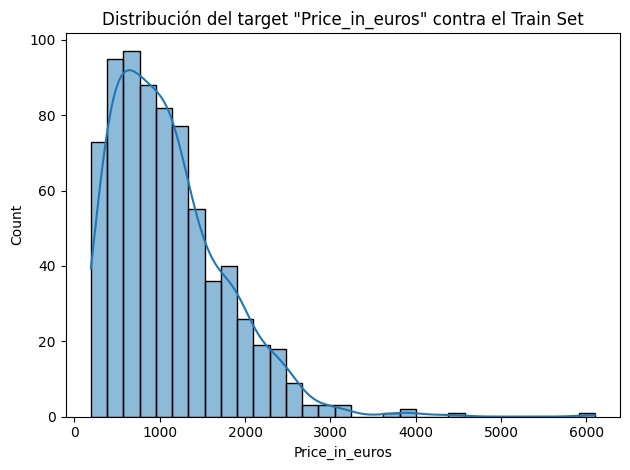

In [11]:
sns.histplot(train_set[target], kde=True)
plt.title('Distribución del target "Price_in_euros" contra el Train Set')
plt.tight_layout()
plt.show()

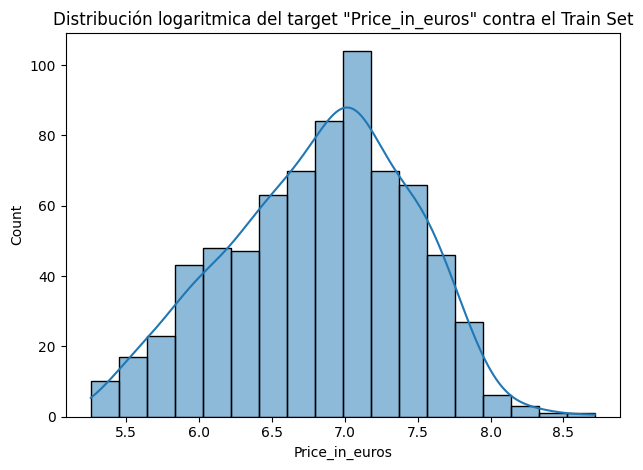

In [12]:
sns.histplot(np.log(train_set[target]), kde=True)
plt.title('Distribución logaritmica del target "Price_in_euros" contra el Train Set')
plt.tight_layout()
plt.show()

In [13]:
y_train = np.log(train_set[target])
y_test = np.log(test_set[target])

In [14]:
X_train["OpSys"] = X_train["OpSys"].replace({
    "Windows 10 S": "Windows 10",
    "Mac OS X": "macOS",
    "Android":"Chrome OS"})

X_train["Ram"] = X_train["Ram"].replace({
    '64GB': '32GB',
    '24GB': '32GB'})

X_train["Inches"] = X_train["Inches"].replace({
    18.4: 17.3,
    11.3: 11.6,
    14.1: 14.0})

X_test["OpSys"] = X_test["OpSys"].replace({
    "Windows 10 S": "Windows 10",
    "Mac OS X": "macOS",
    "Android":"Chrome OS"})

X_test["Ram"] = X_test["Ram"].replace({
    '64GB': '32GB',
    '24GB': '32GB'})

X_test["Inches"] = X_test["Inches"].replace({
    18.4: 17.3,
    11.3: 11.6,
    14.1: 14.0})

In [15]:
for col in X_train.columns:
    print(f"\n🔹 Value Counts de '{col}':")
    print(X_train[col].value_counts())
    print("_" * 50)


🔹 Value Counts de 'Company':
Company
Lenovo       162
Dell         158
HP           155
Asus         101
Acer          55
Toshiba       31
MSI           30
Apple         13
Razer          4
Mediacom       4
Xiaomi         3
Microsoft      3
Samsung        3
Google         2
Fujitsu        2
Vero           2
Chuwi          1
Name: count, dtype: int64
__________________________________________________

🔹 Value Counts de 'Product':
Product
XPS 13               20
Inspiron 3567        17
250 G6               12
ProBook 450          12
EliteBook 840        11
                     ..
N42-20 Chromebook     1
ROG GL553VE-FY022     1
Ideapad 700-15ISK     1
E5 774G               1
Thinkpad T470p        1
Name: count, Length: 408, dtype: int64
__________________________________________________

🔹 Value Counts de 'TypeName':
TypeName
Notebook              412
Gaming                113
Ultrabook             113
2 in 1 Convertible     62
Netbook                16
Workstation            13
Name: co

### 2. Transformación de Features

#### 2.1 Memory

In [16]:
# -----------------------
# Funciones de transformación
# -----------------------

def extract_capacity(memory_str):
    """
    Extrae la primera capacidad encontrada (número + unidad) en la cadena memory_str.
    Convierte TB a GB (en este ejemplo, 1 TB = 1024 GB).
    """
    match = re.search(r'(\d+(?:\.\d+)?)\s*(GB|TB)', str(memory_str), re.IGNORECASE)
    if match:
        capacity = float(match.group(1))
        unit = match.group(2).upper()
        if unit == "TB":
            capacity *= 1024
        return capacity
    return None

def extract_storage_info(memory_str):
    """
    Extrae las capacidades por tipo de almacenamiento (SSD, HDD y Flash Storage).
    Divide la cadena usando '+' en caso de tener varios discos y acumula las capacidades.
    Devuelve una tupla: (ssd_capacity, hdd_capacity, flash_capacity).
    """
    ssd_capacity = 0
    hdd_capacity = 0
    flash_capacity = 0
    
    parts = str(memory_str).split("+")
    for part in parts:
        part = part.strip()
        match = re.search(r'(\d+(?:\.\d+)?)\s*(GB|TB)', part, re.IGNORECASE)
        if match:
            capacity = float(match.group(1))
            unit = match.group(2).upper()
            if unit == "TB":
                capacity *= 1024
            part_upper = part.upper()
            if "SSD" in part_upper:
                ssd_capacity += capacity
            elif "HDD" in part_upper:
                hdd_capacity += capacity
            elif "FLASH STORAGE" in part_upper:
                flash_capacity += capacity
    return ssd_capacity, hdd_capacity, flash_capacity


In [17]:
# -----------------------
# Función que acumula transformaciones en el DataFrame (En el feat Memory)
# -----------------------

def transform_memory_feature(df):
    """
    A partir del DataFrame df, añade las siguientes transformaciones a la columna "Memory":
      - Memory_Capacity_GB: Capacidad total extraída.
      - SSD_Capacity_GB, HDD_Capacity_GB, Flash_Capacity_GB: Capacidades por tipo.
      - Has_SSD, Has_HDD, Has_Flash_Storage: Indicadores (flags) de la presencia de cada tipo.
    Finalmente, elimina la columna original "Memory".
    
    Además, se convierten las columnas de capacidad (que originalmente son float) a int64.
    """
    # Trabajamos sobre una copia para no modificar el original
    df_final = df.copy()
    
    # Extraer la capacidad total en GB
    df_final["Memory_Capacity_GB"] = df_final["Memory"].apply(extract_capacity)
    
    # Extraer capacidades por tipo (SSD, HDD y Flash Storage)
    df_final[['SSD_Capacity_GB', 'HDD_Capacity_GB', 'Flash_Capacity_GB']] = df_final["Memory"].apply(
        lambda x: pd.Series(extract_storage_info(x))
    )
    
    # Crear indicadores (flags) para cada tipo de almacenamiento
    df_final["Has_SSD"] = df_final["Memory"].apply(lambda x: 1 if "SSD" in str(x).upper() else 0)
    df_final["Has_HDD"] = df_final["Memory"].apply(lambda x: 1 if "HDD" in str(x).upper() else 0)
    df_final["Has_Flash_Storage"] = df_final["Memory"].apply(lambda x: 1 if "FLASH STORAGE" in str(x).upper() else 0)
    
    # Convertir las columnas de capacidad a int64 (redondeando primero, para evitar pérdida de información)
    df_final["Memory_Capacity_GB"] = df_final["Memory_Capacity_GB"].round(0).astype("int64")
    df_final["SSD_Capacity_GB"] = df_final["SSD_Capacity_GB"].round(0).astype("int64")
    df_final["HDD_Capacity_GB"] = df_final["HDD_Capacity_GB"].round(0).astype("int64")
    df_final["Flash_Capacity_GB"] = df_final["Flash_Capacity_GB"].round(0).astype("int64")
    
    # Eliminar la columna original "Memory"
    df_final = df_final.drop("Memory", axis=1)
    
    return df_final

In [18]:
# -----------------------
# Aplicar la transformación acumulativa a X_train y X_test
# -----------------------

# Suponiendo que X_train y X_test ya existen en tu entorno:
X_train_final = transform_memory_feature(X_train)
X_test_final = transform_memory_feature(X_test)

In [19]:
# -----------------------
# Verificar el resultado: mostrar algunas columnas transformadas
# -----------------------

cols_to_show1 = ["Memory_Capacity_GB", "SSD_Capacity_GB", "HDD_Capacity_GB", 
                "Flash_Capacity_GB", "Has_SSD", "Has_HDD", "Has_Flash_Storage"]

X_train_final[cols_to_show1].sample(10)

,Memory_Capacity_GB,SSD_Capacity_GB,HDD_Capacity_GB,Flash_Capacity_GB,Has_SSD,Has_HDD,Has_Flash_Storage
75,128,128,1024,0,1,1,0
947,1024,1024,0,0,1,0,0
27,128,0,0,128,0,0,1
1180,1024,0,1024,0,0,1,0
88,256,256,0,0,1,0,0
749,256,256,0,0,1,0,0
562,500,0,500,0,0,1,0
936,256,256,0,0,1,0,0
738,128,128,1024,0,1,1,0
253,500,0,500,0,0,1,0


In [20]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 1118 to 418
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             729 non-null    object 
 1   Product             729 non-null    object 
 2   TypeName            729 non-null    object 
 3   Inches              729 non-null    float64
 4   ScreenResolution    729 non-null    object 
 5   Cpu                 729 non-null    object 
 6   Ram                 729 non-null    object 
 7   Gpu                 729 non-null    object 
 8   OpSys               729 non-null    object 
 9   Weight              729 non-null    object 
 10  Memory_Capacity_GB  729 non-null    int64  
 11  SSD_Capacity_GB     729 non-null    int64  
 12  HDD_Capacity_GB     729 non-null    int64  
 13  Flash_Capacity_GB   729 non-null    int64  
 14  Has_SSD             729 non-null    int64  
 15  Has_HDD             729 non-null    int64  
 16  Has_Flash_

In [21]:
X_train_final.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Memory_Capacity_GB,SSD_Capacity_GB,HDD_Capacity_GB,Flash_Capacity_GB,Has_SSD,Has_HDD,Has_Flash_Storage
1118,HP,ZBook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,AMD FirePro W6150M,Windows 7,3.0kg,1024,0,1024,0,0,1,0
153,Dell,Inspiron 5577,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,Nvidia GeForce GTX 1050,Windows 10,2.56kg,512,512,0,0,1,0,0
275,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.9GHz,8GB,Intel Iris Graphics 550,macOS,1.37kg,512,512,0,0,1,0,0
1100,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,Intel HD Graphics 520,Windows 7,1.54kg,500,0,500,0,0,1,0
131,Dell,Inspiron 5770,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,AMD Radeon 530,Windows 10,2.8kg,256,256,2048,0,1,1,0


#### 2.2 Variables numéricas (Ram - Weight)

In [22]:
# Transformar las columnas y agregar las nuevas columnas
X_train_final["ram_gb"] = X_train["Ram"].str.replace("GB", "").astype("int64")
X_train_final["Weight_kg"] = X_train["Weight"].str.replace("kg", "").astype("float64")

X_test_final["ram_gb"] = X_test["Ram"].str.replace("GB", "").astype("int64")
X_test_final["Weight_kg"] = X_test["Weight"].str.replace("kg", "").astype("float64")

# Eliminar las columnas originales
X_train_final = X_train_final.drop(columns=["Ram", "Weight"])
X_test_final = X_test_final.drop(columns=["Ram", "Weight"])

In [23]:
cols_to_show2 = ["ram_gb", "Weight_kg"]

X_train_final[cols_to_show2].sample(10)

,ram_gb,Weight_kg
642,8,2.00
427,16,2.00
587,4,1.45
978,8,2.04
216,16,2.90
312,8,2.20
1033,8,1.43
569,16,1.16
780,16,1.71
643,8,1.99


In [24]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 1118 to 418
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             729 non-null    object 
 1   Product             729 non-null    object 
 2   TypeName            729 non-null    object 
 3   Inches              729 non-null    float64
 4   ScreenResolution    729 non-null    object 
 5   Cpu                 729 non-null    object 
 6   Gpu                 729 non-null    object 
 7   OpSys               729 non-null    object 
 8   Memory_Capacity_GB  729 non-null    int64  
 9   SSD_Capacity_GB     729 non-null    int64  
 10  HDD_Capacity_GB     729 non-null    int64  
 11  Flash_Capacity_GB   729 non-null    int64  
 12  Has_SSD             729 non-null    int64  
 13  Has_HDD             729 non-null    int64  
 14  Has_Flash_Storage   729 non-null    int64  
 15  ram_gb              729 non-null    int64  
 16  Weight_kg 

In [25]:
X_train_final.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Gpu,OpSys,Memory_Capacity_GB,SSD_Capacity_GB,HDD_Capacity_GB,Flash_Capacity_GB,Has_SSD,Has_HDD,Has_Flash_Storage,ram_gb,Weight_kg
1118,HP,ZBook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,AMD FirePro W6150M,Windows 7,1024,0,1024,0,0,1,0,8,3.00
153,Dell,Inspiron 5577,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,Nvidia GeForce GTX 1050,Windows 10,512,512,0,0,1,0,0,16,2.56
275,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.9GHz,Intel Iris Graphics 550,macOS,512,512,0,0,1,0,0,8,1.37
1100,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,Intel HD Graphics 520,Windows 7,500,0,500,0,0,1,0,4,1.54
131,Dell,Inspiron 5770,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,AMD Radeon 530,Windows 10,256,256,2048,0,1,1,0,16,2.80


#### 2.3 ScreenResolution

In [26]:
# -----------------------
# Función que acumula transformaciones en la columna ScreenResolution
# -----------------------

def transform_screen_resolution(df):
    """
    A partir del DataFrame df, añade las siguientes transformaciones a la columna "ScreenResolution":
      - Resolution_Width: Ancho extraído de la resolución.
      - Resolution_Height: Alto extraído de la resolución.
      - Touchscreen: Indicador (flag) si la pantalla es táctil.
      - IPS: Indicador (flag) si la pantalla es IPS.
    Finalmente, elimina la columna original "ScreenResolution".
    """
    df_final = df.copy()
    
    # Extraer ancho y alto de la resolución
    df_final["Resolution_Width"] = df_final["ScreenResolution"].apply(
        lambda x: int(re.findall(r'(\d+)x(\d+)', str(x))[0][0]) if re.findall(r'(\d+)x(\d+)', str(x)) else None
    )
    df_final["Resolution_Height"] = df_final["ScreenResolution"].apply(
        lambda x: int(re.findall(r'(\d+)x(\d+)', str(x))[0][1]) if re.findall(r'(\d+)x(\d+)', str(x)) else None
    )

    # Indicadores de características adicionales
    df_final["Touchscreen"] = df_final["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in str(x) else 0)
    df_final["IPS"] = df_final["ScreenResolution"].apply(lambda x: 1 if "IPS" in str(x) else 0)

    # Eliminar la columna original "ScreenResolution"
    df_final = df_final.drop("ScreenResolution", axis=1)
    
    return df_final

In [27]:
# -----------------------
# Aplicar la transformación a X_train y X_test
# -----------------------

X_train_final = transform_screen_resolution(X_train_final)
X_test_final = transform_screen_resolution(X_test_final)

In [28]:
# -----------------------
# Verificar el resultado: mostrar algunas columnas transformadas
# -----------------------

cols_to_show3 = ["Resolution_Width", "Resolution_Height", "Touchscreen", "IPS"]

X_train_final[cols_to_show3].sample(10)

,Resolution_Width,Resolution_Height,Touchscreen,IPS
347,1920,1080,0,0
281,1920,1080,0,0
507,1366,768,0,0
619,1366,768,0,0
1094,1920,1080,0,0
471,1920,1080,0,0
1049,1920,1080,0,0
834,1366,768,0,0
764,3200,1800,1,1
687,1920,1080,0,0


In [29]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 1118 to 418
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             729 non-null    object 
 1   Product             729 non-null    object 
 2   TypeName            729 non-null    object 
 3   Inches              729 non-null    float64
 4   Cpu                 729 non-null    object 
 5   Gpu                 729 non-null    object 
 6   OpSys               729 non-null    object 
 7   Memory_Capacity_GB  729 non-null    int64  
 8   SSD_Capacity_GB     729 non-null    int64  
 9   HDD_Capacity_GB     729 non-null    int64  
 10  Flash_Capacity_GB   729 non-null    int64  
 11  Has_SSD             729 non-null    int64  
 12  Has_HDD             729 non-null    int64  
 13  Has_Flash_Storage   729 non-null    int64  
 14  ram_gb              729 non-null    int64  
 15  Weight_kg           729 non-null    float64
 16  Resolution

#### 2.4 Cpu

In [30]:
def transform_cpu_feature(df):
    """
    A partir del DataFrame df, añade las siguientes transformaciones a la columna "Cpu":
      - Cpu_Brand: Extrae la marca de la CPU (ejemplo: "Intel", "AMD").
      - Cpu_Generation: Extrae el primer número de 4 dígitos encontrado en la descripción de la CPU, 
                        si no hay ninguno, asigna "Unknown".
    Finalmente, elimina la columna original "Cpu".
    """
    df_final = df.copy()
    
    # Extraer la marca de la CPU (primer elemento de la cadena)
    df_final["Cpu_Brand"] = df_final["Cpu"].apply(lambda x: str(x).split()[0] if isinstance(x, str) else -1)
    
    # Extraer la generación de la CPU (primer número de 4 dígitos encontrado, o "Unknown" si no hay)
    df_final["Cpu_Generation"] = df_final["Cpu"].apply(
        lambda x: re.findall(r'\d{4}', str(x))[0] if re.findall(r'\d{4}', str(x)) else -1
    )

    # Reemplazar Unknown por -1 para evitar errores al momento de instanciar el modelo
    df_final["Cpu_Generation"] = df_final["Cpu_Generation"].astype("int64")

    # Eliminar la columna original "Cpu"
    df_final = df_final.drop("Cpu", axis=1)
    
    return df_final

In [31]:
# -----------------------
# Aplicar la transformación a X_train y X_test
# -----------------------

X_train_final = transform_cpu_feature(X_train_final)
X_test_final = transform_cpu_feature(X_test_final)

In [32]:
# -----------------------
# Verificar el resultado: mostrar algunas columnas transformadas
# -----------------------

cols_to_show4 = ["Cpu_Brand", "Cpu_Generation"]

X_train_final[cols_to_show4].sample(10)

,Cpu_Brand,Cpu_Generation
462,Intel,3710
578,Intel,3710
783,Intel,6200
1160,Intel,6300
340,Intel,7700
341,Intel,7300
89,Intel,7200
978,Intel,7200
1190,Intel,3050
712,Intel,6006


#### 2.5 Gpu

In [33]:
# -----------------------
# Función que transforma la columna Gpu y la elimina
# -----------------------

def transform_gpu_feature(df):
    """
    A partir del DataFrame df, añade las siguientes transformaciones a la columna "Gpu":
      - Gpu_Brand: Extrae la marca de la GPU (ejemplo: "Nvidia", "AMD").
      - Gpu_Model: Extrae el primer número de 3 o 4 dígitos encontrado en la descripción de la GPU.
    Finalmente, elimina la columna original "Gpu".
    """
    df_final = df.copy()
    
    # Extraer la marca de la GPU (primer elemento de la cadena)
    df_final["Gpu_Brand"] = df_final["Gpu"].apply(lambda x: str(x).split()[0] if isinstance(x, str) else "Unknown")
    
    # Extraer el modelo de la GPU (primer número de 3 o 4 dígitos encontrado)
    df_final["Gpu_Model"] = df_final["Gpu"].apply(
        lambda x: re.findall(r'\d{3,4}', str(x))[0] if re.findall(r'\d{3,4}', str(x)) else -1
    )
    
    # Convertir Gpu_Model a tipo int
    df_final["Gpu_Model"] = df_final["Gpu_Model"].astype("int64")
    
    # Eliminar la columna original "Gpu"
    df_final = df_final.drop("Gpu", axis=1)
    
    return df_final

In [34]:
# -----------------------
# Aplicar la transformación a X_train y X_test
# -----------------------

X_train_final = transform_gpu_feature(X_train_final)
X_test_final = transform_gpu_feature(X_test_final)

In [35]:
# -----------------------
# Verificar el resultado: mostrar algunas columnas transformadas
# -----------------------

cols_to_show5 = ["Gpu_Brand", "Gpu_Model"]

X_train_final[cols_to_show5].sample(10)

,Gpu_Brand,Gpu_Model
128,Intel,400
281,AMD,530
376,Nvidia,940
94,Intel,620
1120,Intel,520
110,Nvidia,940
521,Nvidia,150
144,AMD,550
305,Intel,620
465,Intel,640


#### 2.6 Variables categóricas (Company, TypeName, OpSys, Cpu_Brand, Gpu_Brand)

In [36]:
# -----------------------
# Aplicar la transformación a X_train y X_test
# -----------------------

encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

# Definir las columnas a codificar
cols_to_encode1 = ["Company", "TypeName", "OpSys","Cpu_Brand", "Gpu_Brand"]
# cols_to_encode1 = ["Company", "OpSys", "TypeName", "Gpu_Brand"]
# cols_to_encode2 = ["Cpu_Brand"]

X_train_final = pd.get_dummies(X_train_final, columns = cols_to_encode1)
X_test_final = pd.get_dummies(X_test_final, columns = cols_to_encode1)

# X_train_final[cols_to_encode2] = encoder.fit_transform(X_train_final[cols_to_encode2])
# X_test_final[cols_to_encode2] = encoder.transform(X_test_final[cols_to_encode2])

In [37]:
# Convertir todas las columnas booleanas a números usando map
X_train_final = X_train_final.apply(lambda col: col.map({True: 1, False: 0}) if col.dtypes == 'bool' else col)
X_test_final = X_test_final.apply(lambda col: col.map({True: 1, False: 0}) if col.dtypes == 'bool' else col)

In [38]:
# -----------------------
# Verificar el resultado: mostrar las primeras filas después de aplicar el encoding
# -----------------------

X_train_final.head()

,Product,Inches,Memory_Capacity_GB,SSD_Capacity_GB,HDD_Capacity_GB,Flash_Capacity_GB,Has_SSD,Has_HDD,Has_Flash_Storage,ram_gb,...,OpSys_Linux,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 7,OpSys_macOS,Cpu_Brand_AMD,Cpu_Brand_Intel,Gpu_Brand_AMD,Gpu_Brand_Intel,Gpu_Brand_Nvidia
1118,ZBook 17,17.3,1024,0,1024,0,0,1,0,8,...,0,0,0,1,0,0,1,1,0,0
153,Inspiron 5577,15.6,512,512,0,0,1,0,0,16,...,0,0,1,0,0,0,1,0,0,1
275,MacBook Pro,13.3,512,512,0,0,1,0,0,8,...,0,0,0,0,1,0,1,0,1,0
1100,EliteBook 840,14.0,500,0,500,0,0,1,0,4,...,0,0,0,1,0,0,1,0,1,0
131,Inspiron 5770,17.3,256,256,2048,0,1,1,0,16,...,0,0,1,0,0,0,1,1,0,0


#### 2.7 Eliminar columna Product ya que, no aporta valor a nuestro analisis/modelo

In [39]:
# Eliminar la columna "Product" en X_train_final y X_test_final
X_train_final = X_train_final.drop("Product", axis=1)
X_test_final = X_test_final.drop("Product", axis=1)

# Verificar el resultado
X_train_final.head()

,Inches,Memory_Capacity_GB,SSD_Capacity_GB,HDD_Capacity_GB,Flash_Capacity_GB,Has_SSD,Has_HDD,Has_Flash_Storage,ram_gb,Weight_kg,...,OpSys_Linux,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 7,OpSys_macOS,Cpu_Brand_AMD,Cpu_Brand_Intel,Gpu_Brand_AMD,Gpu_Brand_Intel,Gpu_Brand_Nvidia
1118,17.3,1024,0,1024,0,0,1,0,8,3.00,...,0,0,0,1,0,0,1,1,0,0
153,15.6,512,512,0,0,1,0,0,16,2.56,...,0,0,1,0,0,0,1,0,0,1
275,13.3,512,512,0,0,1,0,0,8,1.37,...,0,0,0,0,1,0,1,0,1,0
1100,14.0,500,0,500,0,0,1,0,4,1.54,...,0,0,0,1,0,0,1,0,1,0
131,17.3,256,256,2048,0,1,1,0,16,2.80,...,0,0,1,0,0,0,1,1,0,0


In [40]:
len(X_train_final.columns)

50

In [41]:
len(X_test_final.columns)

48

In [42]:
# Asegurarse de que X_test_final tenga las mismas columnas que X_train_final
for col in X_train_final.columns:
    if col not in X_test_final.columns:
        X_test_final[col] = 0  # Asignamos 0 a las columnas faltantes en el X_test_final

# Alinear las columnas de X_test_final con X_train_final
X_test_final = X_test_final[X_train_final.columns]

In [43]:
len(X_test_final.columns)

50

#### 2.8 Estandarización para modelo de Regresión Lineal

In [44]:
tml.describe_df(X_train_final)

,Column Name,Data Type,Null Percentage (%),Unique Values,Cardinality (%)
0,Inches,float64,0.0,13,1.783265
1,Memory_Capacity_GB,int64,0.0,13,1.783265
2,SSD_Capacity_GB,int64,0.0,11,1.508916
3,HDD_Capacity_GB,int64,0.0,5,0.685871
4,Flash_Capacity_GB,int64,0.0,7,0.960219
5,Has_SSD,int64,0.0,2,0.274348
6,Has_HDD,int64,0.0,2,0.274348
7,Has_Flash_Storage,int64,0.0,2,0.274348
8,ram_gb,int64,0.0,7,0.960219
9,Weight_kg,float64,0.0,142,19.478738


In [45]:
features_num = ["Weight_kg", "Gpu_Model", "Cpu_Generation", "Inches", "Memory_Capacity_GB", "SSD_Capacity_GB", "HDD_Capacity_GB", "Flash_Capacity_GB", "ram_gb", "Resolution_Width", "Resolution_Height"]

In [46]:
X_train_standardized = X_train_final.copy()
X_test_standardized = X_test_final.copy()

scaler = StandardScaler()
X_train_standardized[X_train_final.columns] = scaler.fit_transform(X_train_final[X_train_final.columns])
X_test_standardized[X_test_final.columns] = scaler.transform(X_test_final[X_test_final.columns])

In [47]:
from sklearn.decomposition import PCA 

pca_ml = PCA()
pca_ml.fit(X_train_standardized)
X_train_pca = pca_ml.transform(X_train_standardized)
X_test_pca = pca_ml.transform(X_test_standardized)

In [48]:
X_train_pca.shape

(729, 50)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[1.17667759e-01 1.01037666e-01 7.11511108e-02 5.02343825e-02
 4.34463074e-02 4.07218953e-02 3.64188222e-02 3.50474605e-02
 2.95213158e-02 2.74439455e-02 2.48869937e-02 2.37165197e-02
 2.30541725e-02 2.25683897e-02 2.16756768e-02 2.12519527e-02
 2.09844854e-02 2.07134983e-02 2.03127731e-02 2.01401501e-02
 2.00605241e-02 1.97481489e-02 1.92672026e-02 1.73869164e-02
 1.58450138e-02 1.45554220e-02 1.36880945e-02 1.30886325e-02
 1.23337105e-02 1.18229983e-02 1.02237390e-02 9.48922645e-03
 9.02568447e-03 7.80938754e-03 7.13743736e-03 6.05444817e-03
 5.22856372e-03 4.16591367e-03 3.40621950e-03 3.22007425e-03
 2.49307440e-03 1.74905697e-03 1.99867417e-04 5.36667516e-06
 2.00771606e-17 1.19427801e-17 8.82797371e-18 2.88299893e-18
 0.00000000e+00 0.00000000e+00]


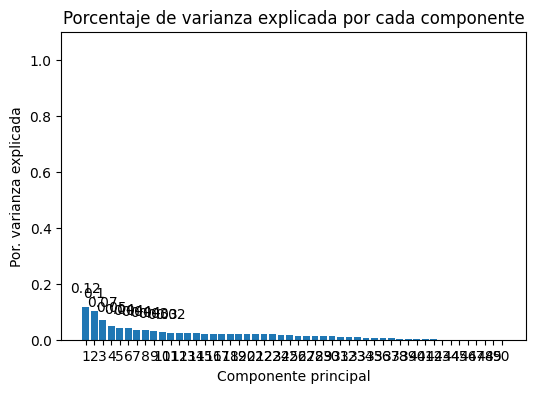

In [49]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca_ml.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca_ml.n_components_) + 1,
    height = pca_ml.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X_train.columns)) + 1, pca_ml.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca_ml.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.11766776 0.21870542 0.28985654 0.34009092 0.38353723 0.42425912
 0.46067794 0.4957254  0.52524672 0.55269066 0.57757766 0.60129418
 0.62434835 0.64691674 0.66859242 0.68984437 0.71082886 0.73154235
 0.75185513 0.77199528 0.7920558  0.81180395 0.83107115 0.84845807
 0.86430308 0.8788585  0.8925466  0.90563523 0.91796894 0.92979194
 0.94001568 0.94950491 0.95853059 0.96633998 0.97347742 0.97953186
 0.98476043 0.98892634 0.99233256 0.99555263 0.99804571 0.99979477
 0.99999463 1.         1.         1.         1.         1.
 1.         1.        ]


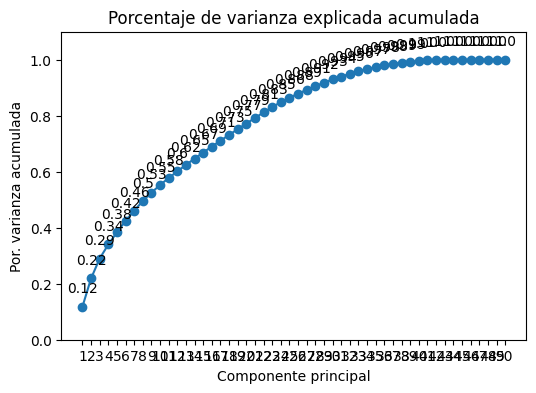

In [50]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca_ml.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(X_test_standardized.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X_test_standardized.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca_ml.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

### 3. Baseline de modelos


In [51]:
# Definir los modelos con parámetros básicos
# Modelos
modelos = {
    "Linear Regression": LinearRegression(),
    # "Ridge Regression": Ridge(random_state=42, max_iter=10000),
    # "Lasso Regression": Lasso(random_state=42, max_iter=10000),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(max_depth=5 ,random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(max_depth=5, random_state=42, n_jobs=-1,tree_method='hist'),
    "LightGBM": LGBMRegressor(max_depth=5, verbose=-100 ,random_state=42, n_jobs=-1, device_type='gpu'),
    # "CatBoost": CatBoostRegressor(max_depth=5, verbose=0, random_state=42, thread_count=-1, task_type='GPU')
}
# Mostrar los modelos definidos
modelos

{'Linear Regression': LinearRegression(),
 'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
 'Random Forest': RandomForestRegressor(max_depth=5, n_jobs=-1, random_state=42),
 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...),
 'LightGBM': LGBMRegressor(device_type='gp

### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [52]:
# -----------------------
# Definir la métrica de evaluación
scoring_func = "neg_root_mean_squared_error"  # Negativo porque cross_val_score busca maximizar el score

# Diccionario para almacenar los mejores resultados
resultados = {}

# Conjuntos de features
feature_sets = {
    "X_train_final": X_train_final,  # Conjunto de entrenamiento original
}

# Evaluar cada modelo con cada conjunto de features
for nombre_modelo, modelo in modelos.items():
    print(f"\nModelo: {nombre_modelo}")
    mejores_resultados = {}

    for nombre_feat, X_train in feature_sets.items():
        # Aplicar np.exp() al target (y_train) para deshacer el logaritmo
        y_train_exp = np.exp(y_train)

        # Si el modelo es una regresión lineal, utilizar las variables estandarizadas
        if isinstance(modelo, LinearRegression):
            print("  Utilizando datos estandarizados para regresión lineal...")
            X_train_uso = X_train_standardized
            X_test_uso = X_test_standardized
        else:
            # Si no es regresión lineal, no estandarizamos
            X_train_uso = X_train
            X_test_uso = X_test_final

        # Validación cruzada con 5 folds en el conjunto de entrenamiento
        scores = cross_val_score(modelo, X_train_uso, y_train_exp, cv=5, scoring=scoring_func)
        rmse_medio_train = -np.mean(scores)  # Se multiplica por -1 porque 'neg_root_mean_squared_error' devuelve valores negativos

        # Evaluación en el conjunto de prueba
        modelo.fit(X_train_uso, y_train_exp)
        y_pred_test = modelo.predict(X_test_uso)
        rmse_test = np.sqrt(mean_squared_error(np.exp(y_test), y_pred_test))  # Aplicamos np.exp() a y_test

        mejores_resultados[nombre_feat] = {
            'RMSE Medio (Train)': rmse_medio_train,
            'RMSE Test': rmse_test
        }
        
        print(f"    RMSE Medio (Train) = {rmse_medio_train:.4f}")
        print(f"    RMSE Test = {rmse_test:.4f}")

    # Guardamos el mejor resultado del modelo
    mejor_feature_set = min(mejores_resultados, key=lambda x: mejores_resultados[x]['RMSE Medio (Train)'])
    resultados[nombre_modelo] = (mejor_feature_set, mejores_resultados[mejor_feature_set])

# Encontrar el modelo con el mejor RMSE Test
mejor_modelo = min(resultados, key=lambda x: resultados[x][1]['RMSE Test'])

# Obtener los resultados del mejor modelo
mejor_resultado = resultados[mejor_modelo]

# Asignar el mejor modelo a la variable `best_model`
best_model = modelos[mejor_modelo]

# Mostrar el mejor modelo con su RMSE
print(f"\n🏆 Mejor modelo por RMSE Test: {mejor_modelo}")
print(f"  RMSE Train = {mejor_resultado[1]['RMSE Medio (Train)']:.4f}")
print(f"  RMSE Test = {mejor_resultado[1]['RMSE Test']:.4f}")



Modelo: Linear Regression
  Utilizando datos estandarizados para regresión lineal...
    RMSE Medio (Train) = 629738480724769.6250
    RMSE Test = 347576374776938.8750

Modelo: Decision Tree
    RMSE Medio (Train) = 388.4734
    RMSE Test = 441.3080

Modelo: Random Forest
    RMSE Medio (Train) = 317.7330
    RMSE Test = 386.5950

Modelo: XGBoost
    RMSE Medio (Train) = 276.0782
    RMSE Test = 312.5770

Modelo: LightGBM
    RMSE Medio (Train) = 287.3864
    RMSE Test = 319.2522

🏆 Mejor modelo por RMSE Test: XGBoost
  RMSE Train = 276.0782
  RMSE Test = 312.5770


### Optimización de Hiperparámetros

In [53]:
# Definir la métrica de evaluación como RMSE
scoring_func = "neg_root_mean_squared_error"  # RMSE negativo porque GridSearchCV busca maximizar el score

# Diccionario para almacenar los mejores resultados
resultados = {}

# Instanciar modelos
modelos = {
    "Linear Regression": LinearRegression(),  # Linear Regression no requiere hiperparámetros adicionales para la configuración.

    "Ridge Regression": Ridge(random_state=42,  # Fija la semilla para garantizar la reproducibilidad.
                              max_iter=10000),  # Número máximo de iteraciones para la optimización. Un valor alto asegura que el modelo pueda converger adecuadamente.

    "Lasso Regression": Lasso(random_state=42,  # Fija la semilla para garantizar la reproducibilidad.
                              max_iter=10000),  # Número máximo de iteraciones para la optimización. Un valor alto asegura que el modelo pueda converger adecuadamente.

    "Decision Tree": DecisionTreeRegressor(max_depth=5,  # Limita la profundidad del árbol para evitar overfitting.
                                           random_state=42),  # Fija la semilla para garantizar la reproducibilidad.

    "Random Forest": RandomForestRegressor(max_depth=5,  # Profundidad máxima de los árboles en el bosque. Evita el overfitting al limitar la complejidad de cada árbol.
                                           random_state=42,  # Fija la semilla para garantizar la reproducibilidad.
                                           n_jobs=-1),  # Usa todos los núcleos disponibles para acelerar el entrenamiento.

    "XGBoost": XGBRegressor(max_depth=5,  # Limita la profundidad máxima de los árboles para evitar overfitting.
                            random_state=42,  # Fija la semilla para garantizar la reproducibilidad.
                            n_jobs=-1,  # Usa todos los núcleos disponibles para acelerar el entrenamiento.
                            tree_method='hist'),  # Utiliza el algoritmo 'hist' para acelerar la construcción de árboles.

    # "LightGBM": LGBMRegressor(max_depth=5,  # Limita la profundidad máxima de los árboles para evitar overfitting.
    #                           verbose=-100,  # Controla la cantidad de información de salida durante el entrenamiento (negativo para minimizar la salida).
    #                           random_state=42,  # Fija la semilla para garantizar la reproducibilidad.
    #                           n_jobs=-1,  # Usa todos los núcleos disponibles para acelerar el entrenamiento.
    #                           device_type='gpu'),  # Usa la GPU para acelerar el entrenamiento si está disponible.
}

# Hiperparámetros para cada modelo
param_grid = {
    "Linear Regression": {}, # Linear Regression no tiene hiperparámetros para ajustar, por lo que no se define en este caso.
    "Ridge Regression": {
        "alpha": np.linspace(0.01, 0.3, 100),  # Parámetro de regularización en Ridge. Aumentar alpha aumenta la penalización y puede reducir el overfitting.
    }, 
    "Lasso Regression": {
        "alpha": np.linspace(0.001, 0.3, 100),  # Parámetro de regularización en Lasso. Similar al Ridge, pero con una penalización más fuerte para coeficientes pequeños (L1).
    },
    "Decision Tree": {
        "max_depth": [5, 10, 15, 20, None],  # Profundidad máxima de los árboles. Limitarla ayuda a evitar overfitting.
        "min_samples_split": [2, 5, 10],  # Número mínimo de muestras necesarias para dividir un nodo. Valores más altos reducen el crecimiento del árbol.
        "min_samples_leaf": [1, 2, 5],  # Número mínimo de muestras en un nodo hoja. Valores más altos hacen que el árbol sea más general.
        "criterion": ["squared_error", "absolute_error"],  # Función de evaluación de la calidad de las divisiones del árbol. "squared_error" es para regresión, "absolute_error" es menos sensible a valores atípicos.
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],  # Número de árboles en el bosque. Más árboles generalmente mejoran la precisión, pero incrementan el tiempo de entrenamiento.
        "max_depth": [3, 5, 10, 15, None],  # Profundidad máxima de los árboles. Limitarla evita el overfitting.
        "min_samples_split": [2, 5, 10],  # Número mínimo de muestras necesarias para dividir un nodo.
        "min_samples_leaf": [1, 2, 4],  # Número mínimo de muestras en un nodo hoja. Controla la complejidad del modelo.
        "bootstrap": [True, False],  # Si True, los árboles se entrenan con muestras aleatorias (con reemplazo); si False, sin reemplazo.
    },
    "XGBoost": {
        "learning_rate": [0.13, 0.15],  # Controla la tasa de aprendizaje del modelo. Valores más bajos hacen que el modelo aprenda de manera más lenta y precisa.
        "max_depth": [3, 4],  # Profundidad máxima de los árboles. Limita la complejidad del modelo para evitar overfitting.
        "n_estimators": [400, 500, 600],  # Número de árboles (estimadores). Más árboles generalmente mejoran la precisión, pero también aumenta el tiempo de entrenamiento.
        "min_child_weight": [1, 2],  # Peso mínimo requerido en un nodo hijo para seguir dividiéndose. Evita divisiones irrelevantes.
        "gamma": [0],  # Controla la poda de nodos. Si la ganancia es menor que gamma, no se divide el nodo.
        "subsample": [0.8, 0.85],  # Porcentaje de muestras usadas para entrenar cada árbol. Ayuda a reducir el overfitting al no usar todos los datos.
        "colsample_bytree": [0.87, 0.9],  # Porcentaje de características (columnas) utilizadas para construir cada árbol. Mayor valor permite más exploración de características.
        "reg_alpha": [0.1, 0.15],  # Regularización L1 (Lasso). Penaliza las características irrelevantes, ayudando a la selección de características.
        "reg_lambda": [2.5, 3],  # Regularización L2 (Ridge). Penaliza los coeficientes de las características para evitar overfitting.
    },
    #  "LightGBM": {
    #     "num_leaves": randint(10, 100),  # Número de hojas en el árbol. Cuanto mayor sea este valor, el modelo puede captar más complejidad, pero también puede llevar a overfitting si es demasiado grande.
    #     "learning_rate": uniform(0.01, 0.1),  # Tasa de aprendizaje. Controla cuánto cambia el modelo en cada iteración. Un valor bajo permite un aprendizaje más preciso y gradual.
    #     "n_estimators": randint(50, 200),  # Número de árboles (estimadores) en el modelo. Más árboles generalmente mejoran la precisión, pero también aumentan el tiempo de entrenamiento.
    #     "max_depth": randint(3, 15),  # Profundidad máxima de los árboles. Limitar la profundidad evita el overfitting.
    #     "min_data_in_leaf": randint(10, 100),  # Número mínimo de datos en una hoja. Evita que el modelo se ajuste demasiado a pequeñas variaciones en los datos.
    #     "boosting_type": ['gbdt', 'dart'],  # Tipo de boosting a usar. 'gbdt' es el boosting tradicional y 'dart' introduce aleatorización en el entrenamiento para mejorar la generalización.

    #  },
}

# Conjunto de características a usar
X_train = X_train_final  # Conjunto original de características
X_train_standardized = X_train_standardized  # Solo para Regresión Lineal

# Variable para almacenar el mejor modelo
best_model = None
best_score = float("inf")  # Inicializamos con un valor muy alto

# Evaluar cada modelo
for nombre_modelo, modelo in modelos.items():
    print(f"\n🔍 Ajustando modelo: {nombre_modelo}")
    mejores_resultados = {}

    # Si el modelo es una regresión lineal, utilizamos las características estandarizadas
    if nombre_modelo in ["Linear Regression", "Ridge Regression", "Lasso Regression"]:
        X_train_uso = X_train_standardized
    else:
        X_train_uso = X_train

    # Aplicar GridSearchCV a todos los modelos excepto LightGBM
    if nombre_modelo != "LightGBM":
        grid_search = GridSearchCV(
            modelo,
            param_grid[nombre_modelo],  # Parámetros del modelo
            cv=10,  # 5 folds de cross-validation
            scoring=scoring_func,
            n_jobs=-1,
            verbose=1
        )

        grid_search.fit(X_train_uso, np.exp(y_train))
        best_model_score = -1 * grid_search.best_score_  # Convertirlo a valor positivo
        best_params = grid_search.best_params_

        mejores_resultados["X_train_final"] = (best_model_score, best_params)
        print(f"  X_train_final: Mejor RMSE = {best_model_score:.4f}, Hiperparámetros = {best_params}")

        # Guardamos el mejor resultado del modelo
        resultados[nombre_modelo] = ("X_train_final", best_model_score, best_params)

        # Actualizamos el mejor modelo si este tiene un mejor RMSE
        if best_model_score < best_score:
            best_score = best_model_score
            best_model = grid_search.best_estimator_

    # Aplicar RandomizedSearchCV solo para LightGBM
    elif nombre_modelo == "LightGBM":
        random_search = RandomizedSearchCV(
            modelo,
            param_grid[nombre_modelo],  # Parámetros de LightGBM
            n_iter=30,  # Número de combinaciones aleatorias a probar
            cv=3,  # 5 folds de cross-validation
            scoring=scoring_func,
            n_jobs=-1,
            random_state=42
        )

        random_search.fit(X_train_uso, np.exp(y_train))
        best_model_score = -1 * random_search.best_score_  # Convertirlo a valor positivo
        best_params = random_search.best_params_

        mejores_resultados["X_train_final"] = (best_model_score, best_params)
        print(f"  X_train_final: Mejor RMSE = {best_model_score:.4f}, Hiperparámetros = {best_params}")

        # Guardamos el mejor resultado del modelo
        resultados[nombre_modelo] = ("X_train_final", best_model_score, best_params)

        # Actualizamos el mejor modelo si este tiene un mejor RMSE
        if best_model_score < best_score:
            best_score = best_model_score
            best_model = random_search.best_estimator_

# Mostrar el mejor resultado por modelo
print("\n🏆 Mejor score (RMSE) por modelo optimizado:")
for modelo, (feat_set, score, params) in resultados.items():
    print(f"{modelo}: {feat_set} con RMSE = {score:.4f}, Hiperparámetros óptimos: {params}")

# Mostrar el mejor modelo y su rendimiento
print("\n🏅 Mejor modelo:")
print(f"Modelo: {best_model}")
print(f"RMSE: {best_score:.4f}")


🔍 Ajustando modelo: Linear Regression
Fitting 10 folds for each of 1 candidates, totalling 10 fits
  X_train_final: Mejor RMSE = 215741287091080.6875, Hiperparámetros = {}

🔍 Ajustando modelo: Ridge Regression
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
  X_train_final: Mejor RMSE = 328.2106, Hiperparámetros = {'alpha': 0.3}

🔍 Ajustando modelo: Lasso Regression
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
  X_train_final: Mejor RMSE = 328.2304, Hiperparámetros = {'alpha': 0.3}

🔍 Ajustando modelo: Decision Tree
Fitting 10 folds for each of 90 candidates, totalling 900 fits
  X_train_final: Mejor RMSE = 337.1539, Hiperparámetros = {'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

🔍 Ajustando modelo: Random Forest
Fitting 10 folds for each of 270 candidates, totalling 2700 fits
  X_train_final: Mejor RMSE = 270.1485, Hiperparámetros = {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 1, 'min

c:\Users\rafae\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


  X_train_final: Mejor RMSE = 237.4441, Hiperparámetros = {'colsample_bytree': 0.87, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 500, 'reg_alpha': 0.1, 'reg_lambda': 3, 'subsample': 0.8}

🏆 Mejor score (RMSE) por modelo optimizado:
Linear Regression: X_train_final con RMSE = 215741287091080.6875, Hiperparámetros óptimos: {}
Ridge Regression: X_train_final con RMSE = 328.2106, Hiperparámetros óptimos: {'alpha': 0.3}
Lasso Regression: X_train_final con RMSE = 328.2304, Hiperparámetros óptimos: {'alpha': 0.3}
Decision Tree: X_train_final con RMSE = 337.1539, Hiperparámetros óptimos: {'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Random Forest: X_train_final con RMSE = 270.1485, Hiperparámetros óptimos: {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
XGBoost: X_train_final con RMSE = 237.4441, Hiperparámetros óptimos: {'colsample_bytree': 0

In [54]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.87, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [62]:
scores_pca = []
for num_PCs in range(30,51):
    print(f"Probando con {num_PCs} componentes:", sep = " ")
    X_train_pca_reduced = X_train_pca[:,:num_PCs]
    score_pca = np.mean(cross_val_score(best_model, X_train_pca_reduced, np.exp(y_train), cv = 10, scoring = "neg_root_mean_squared_error"))
    print(-1 * score_pca)
    scores_pca.append(-1 * score_pca)

Probando con 30 componentes:
319.5754502790582
Probando con 31 componentes:
319.80491885747057
Probando con 32 componentes:
318.52374690029694
Probando con 33 componentes:
315.6347361363305
Probando con 34 componentes:
322.0606775234347
Probando con 35 componentes:
325.49181560052835
Probando con 36 componentes:
318.35467830045934
Probando con 37 componentes:
321.7072168478046
Probando con 38 componentes:
314.34673924691265
Probando con 39 componentes:
322.0450440423311
Probando con 40 componentes:
318.21945810745683
Probando con 41 componentes:
320.83702878957195
Probando con 42 componentes:
316.5862076589268
Probando con 43 componentes:
320.82965471082224
Probando con 44 componentes:
317.0054387614895
Probando con 45 componentes:
317.0089191729441
Probando con 46 componentes:
322.8659098234278
Probando con 47 componentes:
319.9476686048023
Probando con 48 componentes:
317.41374994362627
Probando con 49 componentes:
311.6677588246106
Probando con 50 componentes:
313.38219025224157


In [63]:
min(scores_pca)

311.6677588246106

In [65]:
# Definir los hiperparámetros a optimizar
param_dist = {
        "learning_rate": [0.13, 0.15],  # Controla la tasa de aprendizaje del modelo. Valores más bajos hacen que el modelo aprenda de manera más lenta y precisa.
        "max_depth": [3, 4],  # Profundidad máxima de los árboles. Limita la complejidad del modelo para evitar overfitting.
        "n_estimators": [400, 500, 600],  # Número de árboles (estimadores). Más árboles generalmente mejoran la precisión, pero también aumenta el tiempo de entrenamiento.
        "min_child_weight": [1, 2],  # Peso mínimo requerido en un nodo hijo para seguir dividiéndose. Evita divisiones irrelevantes.
        "gamma": [0],  # Controla la poda de nodos. Si la ganancia es menor que gamma, no se divide el nodo.
        "subsample": [0.8, 0.85],  # Porcentaje de muestras usadas para entrenar cada árbol. Ayuda a reducir el overfitting al no usar todos los datos.
        "colsample_bytree": [0.87, 0.9],  # Porcentaje de características (columnas) utilizadas para construir cada árbol. Mayor valor permite más exploración de características.
        "reg_alpha": [0.1, 0.15],  # Regularización L1 (Lasso). Penaliza las características irrelevantes, ayudando a la selección de características.
        "reg_lambda": [2.5, 3],  # Regularización L2 (Ridge). Penaliza los coeficientes de las características para evitar overfitting.
}

scores_pca = []
best_models = []

for num_PCs in range(35, 51):
    print(f"Probando con {num_PCs} componentes PCA...")

    # Reducir la dimensionalidad
    X_train_pca_reduced = X_train_pca[:, :num_PCs]
    
    # Instanciar el modelo base
    xgb_model = XGBRegressor(random_state=42)

    # Realizar la búsqueda de hiperparámetros con validación cruzada
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_dist,
        n_iter=10,  # Número de combinaciones aleatorias a probar
        scoring="neg_root_mean_squared_error",
        cv=5,
        verbose=1,
        random_state=42,
    )

    random_search.fit(X_train_pca_reduced, np.exp(y_train))  # Ajustar con la transformación inversa de log

    # Obtener la mejor puntuación y modelo
    best_score = -random_search.best_score_
    best_model = random_search.best_estimator_

    print(f"Mejor RMSE para {num_PCs} componentes: {best_score}")
    
    scores_pca.append(best_score)
    best_models.append(best_model)

# Encontrar la cantidad óptima de componentes
best_pcs = range(35, 51)[np.argmin(scores_pca)]
print(f"\nMejor número de componentes PCA: {best_pcs} con RMSE: {min(scores_pca)}")


Probando con 35 componentes PCA...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejor RMSE para 35 componentes: 314.47298310735914
Probando con 36 componentes PCA...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejor RMSE para 36 componentes: 313.15231886994314
Probando con 37 componentes PCA...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejor RMSE para 37 componentes: 311.19117630396937
Probando con 38 componentes PCA...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejor RMSE para 38 componentes: 317.3414152084065
Probando con 39 componentes PCA...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejor RMSE para 39 componentes: 312.2687738219765
Probando con 40 componentes PCA...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejor RMSE para 40 componentes: 313.71280435592604
Probando con 41 componentes PCA...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejor RMSE para 41 compo

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [ ]:
X_pred = pd.read_csv("C:/Users/rafae/Documents/GitHub/ONLINE_DS_THEBRIDGE_RAFAELNEDA/Masterclass/Kaggle/src/data/test.csv", index_col="laptop_ID")
X_pred.index.name = None

X_pred.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
1272,Dell,Inspiron 3552,Notebook,15.6,1366x768,Intel Pentium Quad Core N3700 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg
1141,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics 400,Windows 10,0.69kg
481,Asus,ZenBook Pro,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,12GB,128GB SSD + 1TB HDD,Intel HD Graphics 530,Windows 10,2.06kg
968,Lenovo,Thinkpad T460,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.7kg
917,LG,Gram 15Z970,Ultrabook,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.08kg


In [51]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           391 non-null    object 
 1   Product           391 non-null    object 
 2   TypeName          391 non-null    object 
 3   Inches            391 non-null    float64
 4   ScreenResolution  391 non-null    object 
 5   Cpu               391 non-null    object 
 6   Ram               391 non-null    object 
 7   Memory            391 non-null    object 
 8   Gpu               391 non-null    object 
 9   OpSys             391 non-null    object 
 10  Weight            391 non-null    object 
dtypes: float64(1), object(10)
memory usage: 36.7+ KB


 ## 2. Replicar el procesado para ``test.csv``

In [52]:
X_pred_final = X_pred.copy()
X_pred_final.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
1183,Dell,Inspiron 7567,Gaming,15.6,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62kg
47,Lenovo,IdeaPad 320-15ISK,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,128GB SSD,Intel HD Graphics 520,No OS,2.2kg
186,Lenovo,Yoga 920-13IKB,2 in 1 Convertible,13.9,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.4kg
1225,Lenovo,IdeaPad 320-15AST,Notebook,15.6,1366x768,AMD E-Series 9000 2.2GHz,4GB,500GB HDD,AMD Radeon R2 Graphics,Windows 10,2.2kg
62,Dell,Vostro 5471,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.7kg


In [53]:
X_pred_final["OpSys"] = X_pred_final["OpSys"].replace({
    "Windows 10 S": "Windows 10",
    "Mac OS X": "macOS",
    "Android":"Chrome OS"})

X_pred_final["Ram"] = X_pred_final["Ram"].replace({
    '64GB': '32GB',
    '24GB': '32GB'})

X_pred_final["Inches"] = X_pred_final["Inches"].replace({
    18.4: 17.3,
    11.3: 11.6,
    14.1: 14.0})

In [54]:
# Memory

X_pred_final = transform_memory_feature(X_pred_final)

In [55]:
# Variables Numéricas

# Transformar las columnas y agregar las nuevas columnas
X_pred_final["ram_gb"] = X_pred_final["Ram"].str.replace("GB", "").astype("int64")
X_pred_final["Weight_kg"] = X_pred_final["Weight"].str.replace("kg", "").astype("float64")

# Eliminar las columnas originales
X_pred_final = X_pred_final.drop(columns=["Ram", "Weight"])

In [56]:
# ScreenResolution

X_pred_final = transform_screen_resolution(X_pred_final)

In [57]:
# Cpu

X_pred_final = transform_cpu_feature(X_pred_final)

In [58]:
# Gpu

X_pred_final = transform_gpu_feature(X_pred_final)

In [59]:
# variables categóricas (Company, TypeName, OpSys, Cpu_Brand, Gpu_Brand)

# Definir las columnas a codificar
cols_to_encode1 = ["Company", "OpSys", "TypeName", "Cpu_Brand", "Gpu_Brand"]
# cols_to_encode1 = ["Company", "OpSys", "TypeName", "Gpu_Brand"]
# cols_to_encode2 = ["Cpu_Brand"]

X_pred_final = pd.get_dummies(X_pred_final, columns = cols_to_encode1)
# X_pred_final[cols_to_encode2] = encoder.fit_transform(X_pred_final[cols_to_encode2])

In [60]:
# Eliminar la columna "Product" en X_pred_final

X_pred_final = X_pred_final.drop("Product", axis=1)

In [61]:
# Asegurarse de que X_pred_final tenga las mismas columnas que X_train_final

for col in X_train_final.columns:
    if col not in X_pred_final.columns:
        X_pred_final[col] = 0  # Asignamos 0 a las columnas faltantes en el conjunto de prueba

# Alinear las columnas de X_pred_final con X_train_final
X_pred_final = X_pred_final[X_train_final.columns]

In [62]:
# Convertir todas las columnas booleanas a números usando map

X_pred_final = X_pred_final.apply(lambda col: col.map({True: 1, False: 0}) if col.dtypes == 'bool' else col)

In [63]:
# Estandarizar para modelos sensibles a escala (Regresión Lineal)

X_pred_final_standardized = X_pred_final.copy()
X_pred_final_standardized[features_num] = scaler.transform(X_pred_final[features_num])

In [64]:
X_pred_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Inches                       391 non-null    float64
 1   Memory_Capacity_GB           391 non-null    int64  
 2   SSD_Capacity_GB              391 non-null    int64  
 3   HDD_Capacity_GB              391 non-null    int64  
 4   Flash_Capacity_GB            391 non-null    int64  
 5   Has_SSD                      391 non-null    int64  
 6   Has_HDD                      391 non-null    int64  
 7   Has_Flash_Storage            391 non-null    int64  
 8   ram_gb                       391 non-null    int64  
 9   Weight_kg                    391 non-null    float64
 10  Resolution_Width             391 non-null    int64  
 11  Resolution_Height            391 non-null    int64  
 12  Touchscreen                  391 non-null    int64  
 13  IPS                    

In [65]:
predictions_submit = best_model.predict(X_pred_final)
predictions_submit

array([1456.6713 ,  303.17615,  391.18448,  967.6088 ,  999.6197 ,
        440.30975,  778.5638 , 1094.9498 , 1260.3889 ,  322.99933,
       2138.5322 , 1361.2806 ,  430.38593, 1538.2283 ,  808.67053,
        755.2568 , 2148.1702 , 1413.6196 , 2041.2137 ,  600.1612 ,
       1521.7377 ,  353.561  ,  804.0206 , 1177.547  ,  383.33084,
        786.536  ,  505.70233, 1290.2466 , 3044.273  , 1061.6119 ,
       2656.577  ,  391.95932,  881.45306, 2920.826  , 2250.402  ,
       1553.5632 ,  635.9665 , 1060.8716 ,  971.5153 , 1814.4618 ,
        677.18726,  779.75037,  482.18436, 1305.9316 , 1165.484  ,
       1066.2805 , 1096.7354 ,  620.09125,  625.943  ,  408.80984,
       1725.2312 ,  728.5335 , 1150.5167 ,  327.4993 , 1840.7546 ,
       1698.8297 ,  661.406  ,  887.0254 , 1055.1049 ,  758.12775,
       2570.248  , 2046.9028 ,  521.35455, 2096.6904 , 1262.03   ,
       1118.4452 , 1018.2783 , 1181.1514 , 1989.4807 , 1971.513  ,
        875.58527,  536.4403 , 1053.1932 , 1913.1764 ,  970.61

**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [66]:
# ¿Qué opináis?
# ¿Sí, no?

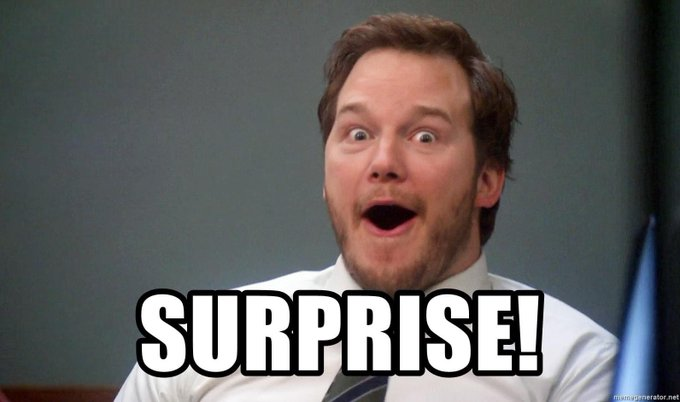

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [67]:
sample = pd.read_csv("./src/data/sample_submission.csv")

In [68]:
sample.sample(5)

,laptop_ID,Price_in_euros
33,986,1762.7
207,168,746.7
209,662,1873.9
259,77,863.3
295,1237,1171.3


In [69]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [70]:
#¿Cómo creamos la submission?
submission = pd.DataFrame({"laptop_ID": X_pred.index , "Price_in_euros" : predictions_submit})

In [71]:
submission.head()

,laptop_ID,Price_in_euros
0,209,1456.671265
1,1281,303.176147
2,1168,391.184479
3,1231,967.608826
4,1020,999.619690


In [72]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [73]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission_V35 (XGBoost27) Notebook V2.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [74]:
chequeador(submission)

You're ready to submit!
